#### Understanding Transformers

Transformers map sequences of input vectors $(x_1,x_2,...,x_n)$ to sequences of output vectors ($y_1,y_2,...,y_n$) of the same length.
Transformers are made up of stacks of transformer **blocks**, each of which is a multilayer network made by combining simple linear layers, feedforward networks, and **self-attention** layers, the key innovation of transformers.
Self-attention allows a network to directly extract and use information from arbitrarily large contexts without the need to pass it through intermediate recurrent connections as in RNNs.

Let us first understand the concept of self-attention and how it works.

##### Dot product

The dot product of two vectors **a** and **b** is defined as:

a.b = |**a**||**b**|cosθ

where |**a**| and |**b**| are the magnitudes of the vectors, and θ is the angle between them.

The dot product is a simple and efficient way of measuring the similarity between two vectors because it has the following properties:

- It is a scalar (a single number), which makes it easy to compare and store.
- It is proportional to the product of the magnitudes of the vectors, which means that larger vectors have larger dot products, and smaller vectors have smaller dot products.
- It is also proportional to the cosine of the angle between the vectors, which means that it captures how aligned or orthogonal the vectors are. The cosine function has a range of [-1, 1], where -1 means the vectors point in opposite directions, 0 means they are perpendicular, and 1 means they point in the same direction. **Therefore, the dot product can be used to measure how similar or dissimilar the vectors are in terms of their direction.**

The dot product can be computed efficiently using matrix multiplication, which is a well-optimized operation in most programming languages and libraries. The dot product can also be computed using element-wise multiplication and summation, which are also fast operations. The dot product does not require any complex operations such as square roots or trigonometric functions, which makes it computationally cheaper than other methods of measuring similarity, such as Euclidean distance or cosine similarity.

The dot product of two vectors is a way of multiplying them to get a scalar (a single number) as a result. It can be defined in two ways: algebraically or geometrically.

Algebraically, the dot product of two vectors **a** and **b** is the sum of the products of their corresponding components. For example, if **a** = (a1, a2, a3) and **b** = (b1, b2, b3), then **a** ⋅ **b** = a1b1 + a2b2 + a3b3.

Geometrically, the dot product of two vectors **a** and **b** is the product of their magnitudes (lengths) and the cosine of the angle between them. For example, if |**a**| and |**b**| are the magnitudes of **a** and **b**, and θ is the angle between them, then **a** ⋅ **b** = |**a**||**b**|cosθ.

Here is an example of how to calculate the dot product using both methods:

Let **a** = (1, 2, 3) and **b** = (4, -5, 6).

Using the algebraic method, we get:

**a** ⋅ **b** = 1(4) + 2(-5) + 3(6) = 4 - 10 + 18 = 12.

Using the geometric method, we need to find the magnitudes of **a** and **b**, and the angle between them. We can use the formulas:

|**a**| = $\sqrt{(1^2 + 2^2 + 3^2)} = \sqrt{(1 + 4 + 9)} = \sqrt{(14)}$

|**b**| = $\sqrt{(4^2 + (-5) ^2 + 6^2)} = \sqrt{(16 + 25 + 36)} = \sqrt(77)$

cosθ = (**a** ⋅ **b**) / (|**a**||**b**|) = 12 / ($\sqrt{14} \sqrt{77}$) $\approx$ 0.365

$\theta = \cos^{-1}(0.365) \approx 1.201 $ radians

As, $degress = radians \times 180/\pi$

θ ≈ 68.56°

Then we get:

**a** ⋅ **b** = |**a**||**b**|cosθ ≈ √14√77(0.365) ≈ 12.

We can see that both methods give the same result.

The dot product has some useful properties, such as:

- It is commutative: **a** ⋅ **b** = **b** ⋅ **a**
- It is distributive: **a** ⋅ (**b** + **c**) = **a** ⋅ **b** + **a** ⋅ **c**
- It is zero if and only if the vectors are perpendicular: **a** ⋅ **b** = 0 ⇔ θ = 90°
- It is positive if the angle between the vectors is acute: **a** ⋅ **b** > 0 ⇔ θ < 90°
- It is negative if the angle between the vectors is obtuse: **a** ⋅ **b** < 0 ⇔ θ > 90°

The dot product can also be used to find the projection of one vector onto another, which is the component of the first vector in the direction of the second vector

Below code example demonstrates the equivalence of algebraic and geometric interpretations.

In [125]:
import numpy as np

a = [1,2,3]
b = [4,-5,6]

print('vector a = ' + str(a))
print('vector b = ' + str(b))

a_dot_b_algebraic = np.dot(a,b)

print('Algebraic dot product (a dot b) = ' + str(a_dot_b_algebraic))

norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)


cos_theta = np.dot(a,b) / (norm_a * norm_b)
theta_rad = np.arccos(cos_theta)
theta_degrees = np.rad2deg(theta_rad)
print('angle theta between vectors a and b = ' + str(theta_degrees) + ' degrees')

a_dot_b_geo = norm_a * norm_b * cos_theta

print('geometric dot product (a dot b) = ' + str(a_dot_b_geo))


vector a = [1, 2, 3]
vector b = [4, -5, 6]
Algebraic dot product (a dot b) = 12
angle theta between vectors a and b = 68.56244696639715 degrees
geometric dot product (a dot b) = 12.0


#### SELF-ATTENTION

The simplest form of comparison between elements in a self-attention layer is a dot product.  Let's refer to the result of this comparison as a score:

$$score(x_i, x_j) = x_i \bullet x_j$$

Then, to make effective use of these scores, we normalize them with a softmax to create a vector of weights, $\alpha_{ij}$, that indicates the proportional relevance of each input to the input element $i$ that is the current focus of attention.

$$\alpha_{ij} = softmax(score(x_i, x_j))  \space \space \forall j \le i$$
$$\implies \alpha_{ij} = \frac{exp(score(x_i, x_j))}{\sum_{k=1}^iexp(score(x_i, x_k))} \space \space \forall j \le i$$

Given the scores in $\alpha$, we can generate an output $y_i$ by taking the sum of the inputs seen so far, weighted by their respective $\alpha$ value.

$$y_i = \sum_{j \le i}(\alpha_{ij}x_j)$$


These steps are the core of an attention-based approach: a set of comparisons to relevant items in some context, a normalization of those scores to provide a probability distribution, followed by a weighted sum using this distribution.  The output $y$ is the result of this straightforward computation over the inputs.

However, transformers allow us to create a more sophisticated way of representing how words (of similar tokens in a different domain e.g. image) can contribute to the representation of longer inputs. 

#### SELF-ATTENTION in TRANSFORMERS

Each input embedding is projected into three different roles during the course of the attention process in transformers:

* **QUERY (Q)** - As the current focus of attention when being compared to all of the other preceding inputs
  
*  **KEY (K)** - In its role as a preceding input being compared to the current focus of attention
  
*   **VALUE (V)** - used to compute the output for the current focus of attention


To capture these three different roles, transformers introduce weight matrices corresponding to Query (Q), Key(K) and Value (V) projections as $W^Q, W^K, W^V$ respectively.

Let's first figure out self-attention for a single input element.  Consider the input embedding $x_i$ at the ith index. Then, these weight matrices will be used to project $x_i$ into key, query or value projections as follows:

$$q_i = W^Q x_i$$
$$k_i = W^K x_i$$
$$v_i = W^V x_i$$

Let us assume that the embedding dimensionality of $x_i$ is $1 \times d$ i.e. it is a d-dimensional vector.  With this, we need $W^Q \in R^{d \times d}, W^K \in R^{d \times d}, W^V \in R^{d \times d}$ for the above projection multiplication compatibility.

**Attention Score**:  Similar to score using dot product we saw earlier, we can arrive at the attention score using these projections as follows:

$$score(x_i, x_j) = q_i \bullet k_j$$

where 
* $q_i$ is the query projection of the embedding vector $x_i$
* $k_j$ is the key projection of the precedding embedding vector $x_j$

Notice that both $q_i$ and $k_j$ have the dimensionality $1 \times d$ compatible for dot product.

The result of dot product can be an arbitrarily large (positive or negative) value.  Exponentiating such large values during softmax calculation can lead to numerical issues and unstable gradients during training.  To avoid this, the dot product needs to be scaled in a suitable manner.  This brings to the idea of **Scaled Dot-Product**.

A Scaled dot product divides the results of the dot product by a factor related to the size of the embeddings before passing them through the softmax.  A typical approach is to divide it by the square root of the dimensionality of the query and key vectors i.e. $d$.  With this the score function comes to:

$$score(x_i, x_j) = \frac{q_i \bullet k_j}{\sqrt{d}}$$

**Softmax**: Now, we apply softmax to turn these scores into a probability distribution as before:


$$\alpha_{ij} = softmax(score(x_i, x_j))  \space \space \forall j \le i$$

**Self-Attention output**: The output calculation for $y_i$ corresponding to $x_i$ is based on a weighted sum over the past value projections $v_j$ where $j \le i$

$$y_i = \sum_{j \le i} \alpha_{ij} v_j$$

Notice that self-attention calculation only takes past inputs into consideration for calculating the current input's attention output.

**Parallelization using Matrices**

So far, we have seen how an input embedding $x_i$ can be transformed into the self-attention output $y_i$ using the attention calculation procedure.  As each of these $y_i$ can be calculated independently, hence, we can apply efficient matrix multiplication routines by packing $N$ input tokens of the input sequence into a single matrix $X \in \R^{N \times d}$.  That is, each row of $X$ is the embedding of one token of the input.  We then multiply $X$ by the key, query and value matrices (all of dimensions $d \times d$) to produce matrices $Q \in \R^{N \times d}$, $K \in \R^{N \times d}$ and $V \in \R^{N \times d}$, containing all the key, query and value vectors:

$$Q = XW^Q$$  
In terms of dimensions, $$Q_{N \times d} = X_{N \times d} W^Q_{d \times d}$$

Similarly, 
$$K = XW^K$$
$$V = XW^V$$

Using these matrices, we can compute the scaled dot product for an entire sequence $N$ by:

scaled-dot product $= \frac{QK^T}{\sqrt(d)}$

now, we can apply softmax to get the probability distribution as:

$softmax(\frac{QK^T}{\sqrt(d)})$

and, finally, we can compute the full self-attention for the entire sequence $N$ by:

$$SelfAttention(Q, K, V) = softmax( \frac{QK^T}{\sqrt(d)} ) V$$


This is great! however, there is one issue that the calculation $QK^T$ results in a score for each query value to every key value, *including those that follow the query that is, the future tokens*.  This is inappropriate when creating a language model that predicts the next word as guessing it would be pretty simple if you already know it.

To fix this, the elements in the upper-triangular portion of the matrix are zeroed out (set to $-\infty$), thus eliminating any knowledge of the words that follow in the sequence.

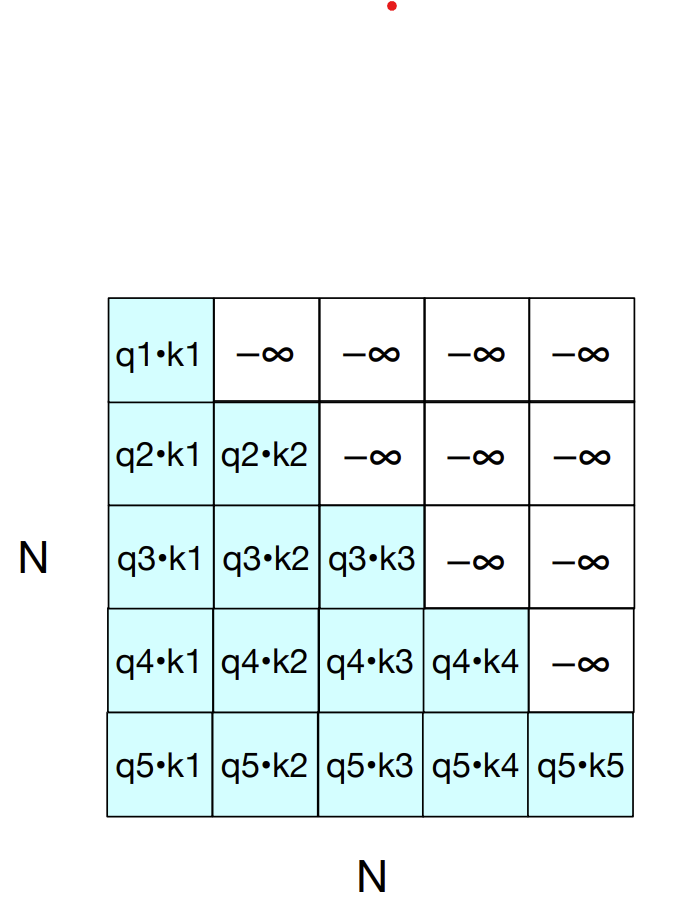


This figure also makes it clear that attention is quadratic in the length of the input ($N$).  This makes it extremely expensive for the input to a transformer to consist of long documents (like entire Wikipedia pages, or novels), and so most applications have to limit the input length.

Let's implement self-attention as a python function:

In [1]:
import pydantic
import numpy as np
from pydantic import BaseModel

In [2]:
mat = np.random.rand(10,1024)
type(mat)
print('Array shape: ' + str(mat.shape[0]) +',' + str(mat.shape[1]))
print('# of dimensions: ' + str(mat.ndim))

Array shape: 10,1024
# of dimensions: 2


In [128]:
import torch
import torch.nn

class CausalSelfAttention(torch.nn.Module):

    def __init__(self, sequenceLength:int,embeddingDimensionality:int):
        super().__init__()
        self.sequenceLength = sequenceLength
        self.embeddingDimension = embeddingDimensionality
        self.inputSequenceEmbeddingMatrix:torch.Tensor
        self.queryMatrix:torch.Tensor  = None
        self.keyMatrix:torch.Tensor = None
        self.valueMatrix:torch.Tensor = None


    def _initialize_parameterMatrix(self, parameterMatrix:torch.tensor):
        
        if parameterMatrix is None:
            parameterMatrix = torch.empty(self.embeddingDimension, self.embeddingDimension)
            parameterMatrix = torch.nn.init.xavier_uniform_(parameterMatrix)
            return parameterMatrix
        else:
            print('parameter matrix already initialized')


    def _ignoreFutureTokensForCausalLm(self, scoreTensor: torch.Tensor)->torch.Tensor:

        assert scoreTensor.shape == torch.Size([self.sequenceLength, self.sequenceLength])
        
        causal_attention_mask = torch.ones(self.sequenceLength, self.sequenceLength).tril() # (N,N)

        causal_scaled_score = scoreTensor.masked_fill(causal_attention_mask[:,:] == 0, -float('inf')) # (N,N)

        return causal_scaled_score

    
    def forward(self, x):          
        
        if(x.ndim != 2):
            raise Exception("inputSequenceEmbeddingMatrix should be a N x d dimensional matrix for N input tokens with each having a embedding dimension of d")

        num_tokens = x.shape[0] #N
        embed_dimension = x.shape[1] #E

        if self.embeddingDimension != embed_dimension:
            raise Exception("inputSequenceEmbeddingMatrix embedding dimension: {embed_dimension} is not matching with initialized embeddingDimension: {embedding_dimension}".format(embed_dimension,self.embeddingDimension))
        
        if self.sequenceLength != num_tokens:
            raise Exception("Sequence lengths don't match")
        
        
        self.queryMatrix = self._initialize_parameterMatrix(self.queryMatrix)
        self.keyMatrix = self._initialize_parameterMatrix(self.keyMatrix)
        self.valueMatrix = self._initialize_parameterMatrix(self.valueMatrix)

        Q = torch.matmul(x, self.queryMatrix) #(N,E) x (E, E) => (N, E)
        K = torch.matmul(x, self.keyMatrix) #(N,E) x (E, E) => (N, E)
        V = torch.matmul(x, self.valueMatrix) #(N,E) x (E, E) => (N, E)

        score = torch.matmul(Q,K.T) ##(N,E) x (E, N) => (N, N)

        scaled_score = score / np.sqrt(embed_dimension) # (N,N)

        causal_scaled_score = self._ignoreFutureTokensForCausalLm(scaled_score)

        #causal_attention_mask = torch.ones(self.sequenceLength, self.sequenceLength).tril() # (N,N)

        #causal_scaled_score = scaled_score.masked_fill(causal_attention_mask[:,:] == 0, -float('inf')) # (N,N)

        causal_scaled_score_softmax = torch.softmax(causal_scaled_score, dim=1) # (N,N)

        # print('Causal scaled score : ' + str(causal_scaled_score))
        # print('Causal Scaled Softmax: ' + str(causal_scaled_score_softmax))

        causal_self_attention_output = causal_scaled_score_softmax @ V # (N,N) dot (N, E)

        return causal_self_attention_output


Let's test this first basic version of self-attention

In [129]:
torch.seed = 123
N = 10 # number of tokens
embed_dim = 5 # embedding dimension of each token
X = torch.rand(N, embed_dim)
print('X: ' + str(X))
print('X.shape: '+ str(X.shape))
selfAttention = CausalSelfAttention(N,embed_dim)

attention_value = selfAttention(X)

# print(attention_value.shape)
print('self-attention output: ' + str(attention_value))
print('self-attention output shape: ' + str(attention_value.shape))

X: tensor([[0.1442, 0.9579, 0.5421, 0.3380, 0.7862],
        [0.3846, 0.9642, 0.1537, 0.0330, 0.7497],
        [0.7935, 0.3170, 0.9301, 0.4729, 0.1489],
        [0.1765, 0.8168, 0.5868, 0.4754, 0.9542],
        [0.5791, 0.7389, 0.3056, 0.8308, 0.9687],
        [0.3138, 0.5859, 0.5341, 0.3559, 0.2715],
        [0.8185, 0.1369, 0.7556, 0.3547, 0.4908],
        [0.6069, 0.9975, 0.4928, 0.5909, 0.0825],
        [0.6803, 0.5039, 0.1928, 0.6228, 0.1586],
        [0.2646, 0.3932, 0.5980, 0.0390, 0.4834]])
X.shape: torch.Size([10, 5])
self-attention output: tensor([[-0.4290,  0.4592, -0.1323, -0.5968, -0.4049],
        [-0.3669,  0.5466,  0.0810, -0.5463, -0.4362],
        [-0.1400,  0.4909,  0.0616, -0.6296, -0.2777],
        [-0.2147,  0.4914, -0.0485, -0.6881, -0.3321],
        [-0.3074,  0.5373, -0.0404, -0.7780, -0.4006],
        [-0.2722,  0.4968, -0.0153, -0.7286, -0.3461],
        [-0.1929,  0.5022, -0.0481, -0.7665, -0.3346],
        [-0.1932,  0.4928,  0.0412, -0.7361, -0.2901],
    

Now, let's use this Self-attention concept in an MLP which is called Transformer block.  Here is the visual representation of a transformer block. 

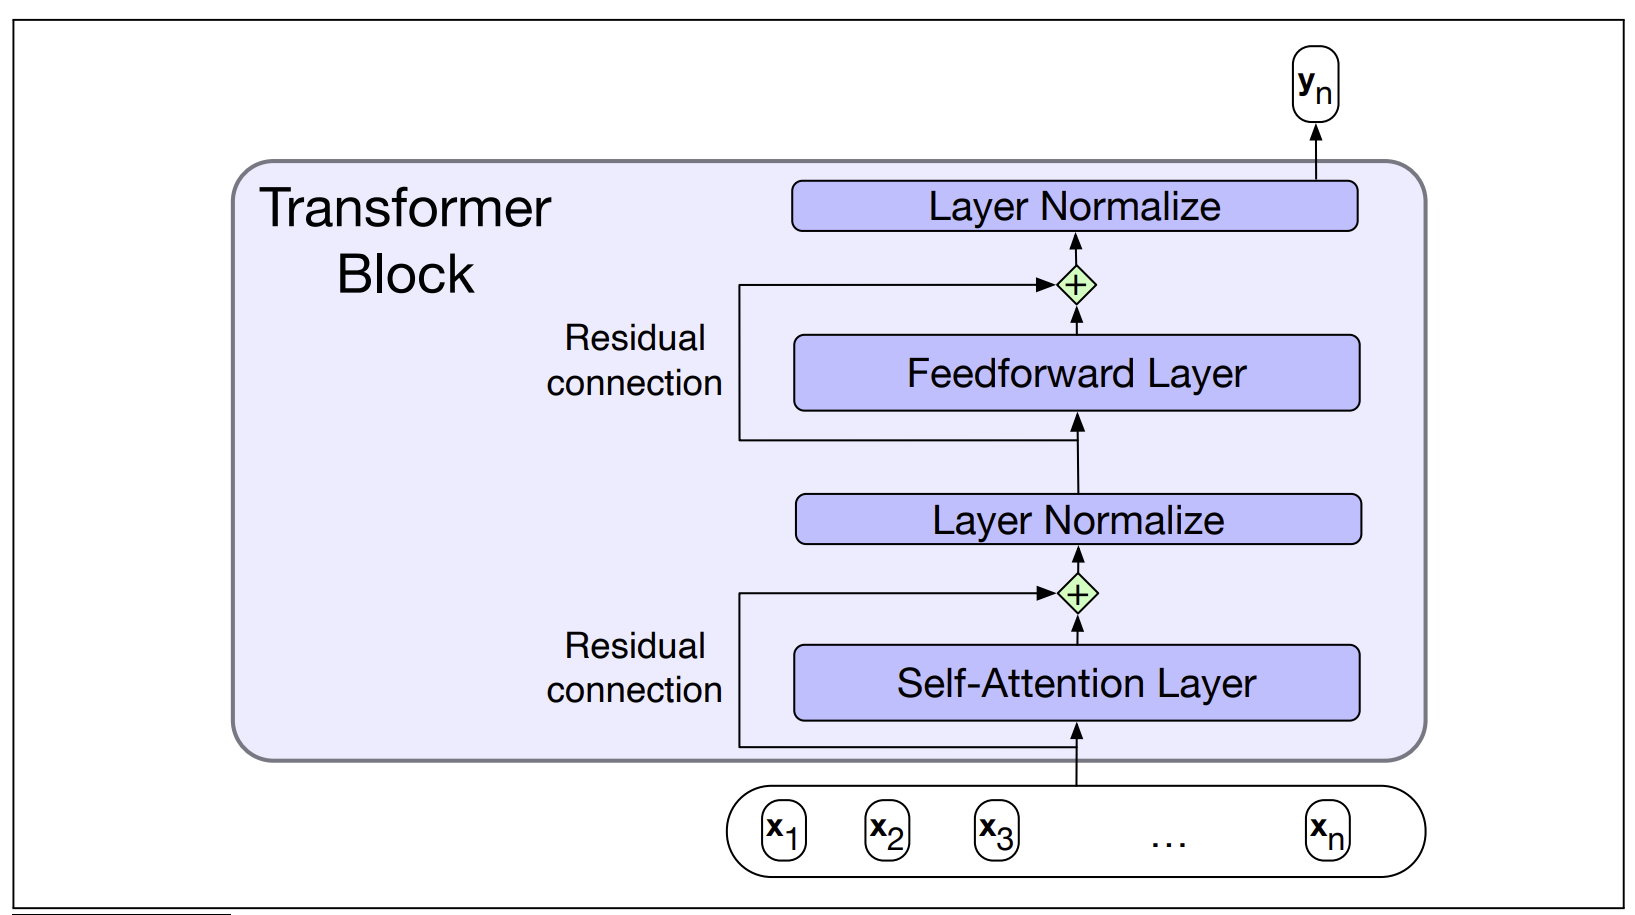

In [130]:
class FFN(torch.nn.Module):   
    """Fully connected Feed forward network with 2 linear layers with a ReLU in between
       as per the original transformer paper.
    """
    
    def __init__(self, embed_dim:int):
        super().__init__()
        self.embed_dim = embed_dim
        self.fcn1 = torch.nn.Linear(embed_dim, 4*embed_dim)
        self.activation = torch.nn.ReLU()
        self.fcn2 = torch.nn.Linear(4*embed_dim, embed_dim)
    
    def forward(self, x):
        x = self.fcn1(x)
        x = self.activation(x)
        x = self.fcn2(x)
        return x

In [131]:
class TransformerBlock(torch.nn.Module):
    def __init__(self, sequenceLength:int, embeddingDimensionality:int):
        super().__init__()
        self.sequenceLength = sequenceLength
        self.embed_dim = embeddingDimensionality
        self.SelfAttentionLayer = CausalSelfAttention(sequenceLength, embeddingDimensionality)
        self.layerNorm = torch.nn.LayerNorm(self.embed_dim)
        self.feedForwardLayer = FFN(self.embed_dim)
    
    def forward(self, x):
        z = self.layerNorm(x + self.SelfAttentionLayer(x))
        y = self.layerNorm(z + self.feedForwardLayer(z))
        return y
        

In [132]:
block = TransformerBlock(N,embed_dim)
Y = block(X)
print(Y.shape)
print(Y)

torch.Size([10, 5])
tensor([[-0.0727,  1.7527,  0.2484, -0.9368, -0.9916],
        [ 0.5459,  1.6533, -0.2457, -0.9765, -0.9770],
        [ 0.8321,  0.2523,  1.0382, -0.3855, -1.7371],
        [-0.8301,  1.6742,  0.5485, -1.0409, -0.3517],
        [ 0.2266,  1.8109, -0.2880, -0.7073, -1.0421],
        [ 0.1988,  1.2601,  0.7047, -0.5645, -1.5991],
        [ 1.1343, -0.1700,  1.1709, -0.9375, -1.1977],
        [ 0.3917,  1.3452,  0.1405, -0.1466, -1.7308],
        [ 0.9276,  0.6990, -0.0431,  0.3026, -1.8861],
        [-0.1976,  1.0154,  1.2733, -1.2926, -0.7985]],
       grad_fn=<NativeLayerNormBackward0>)


##### Modeling token order: Idea of Positional Embedding

Transformer architecture inherently does not have the notion of input sequence or order of the tokens.  To resolve this, we can combine the input embeddings with positional embeddings specific to each token's position.  Specifically, the positional embedding is **added (and, not concatenated to preseve embedding dimensions)** to its corresponding token embedding to produce an input embedding that captures positional information.

A potential problem with the simple absolute position embedding approach is that there may be plenty of training examples for the initial positions in the provided inputs and correspondingly fewer at the outer length limits.  Another problem is during fine-tuning or test time, inputs may be of different lengths than it was trained on.

An alternative approach to positional embedding is to choose a static function that maps integer inputs to real-valued vectors in a way that captures the inherent relationships among the positions.  That is, it captures the fact that position 4 in an input is more closely related to position 5 than it to position 17.  A combination of $\sin()$ and $\cos()$ with differing frequencies was used in the original transformer work.

Positional Embedding Equation (from paper):

![Positional Embedding](./images/Transformer_PositionalEmbeddingEquations.png)


References: 
* https://github.com/tensorflow/tensor2tensor/blob/bafdc1b67730430d38d6ab802cbd51f9d053ba2e/tensor2tensor/layers/common_attention.py#L4481
* https://github.com/tensorflow/tensor2tensor/pull/177

In [133]:
# print(np.arange(10)[:,np.newaxis])
# print(np.arange(10)[np.newaxis,:])

In [145]:
def get_angles(token_positions, embedding_channels, token_embed_dim:int):
  angle_rates = 1 / np.power(10000, (2 * (embedding_channels//2)) / np.float32(token_embed_dim))
  # print('angle rates: ' + str(angle_rates))
  return token_positions * angle_rates

def get_positional_encoding(num_tokens:int, token_embedding_dim:int):
  
  token_positions = np.arange(num_tokens)[:, np.newaxis]
  
  # print(token_positions.shape)
  
  token_embedding_channels = np.arange(token_embedding_dim)[np.newaxis, :]

  # print(token_embedding_channels.shape)

  angle_rads = get_angles(token_positions, token_embedding_channels, token_embedding_dim)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2]) # 0::2 -> stepsize of 2 starting with 0 thus selecting even indices
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2]) # 1::2 --> stepsize of 2 starting with 1 thus selecting odd indices
    
  # pos_encoding = angle_rads[np.newaxis, ...]

  # print('angle_rads.shape: ' + str(angle_rads.shape))

  return torch.Tensor(angle_rads)

In [159]:
# test run the positional encoding code

num_tokens = 2
tok_emb_dim = 5
# token_positions = np.arange(num_tokens)[:, np.newaxis]
# token_embedding_channels = np.arange(tok_emb_dim)[np.newaxis, :]
# print('token positions: ' + str(token_positions))
# print('token embedding channels: ' + str(token_embedding_channels))
# angles = get_angles(token_positions, token_embedding_channels, tok_emb_dim)
# print(angles)

pos_enc = get_positional_encoding(num_tokens, tok_emb_dim)

print(pos_enc)
print(pos_enc.shape)

tensor([[0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [8.4147e-01, 5.4030e-01, 2.5116e-02, 9.9968e-01, 6.3096e-04]])
torch.Size([2, 5])


Let's plot a sample of positional embeddings to visualize the same.

torch.Size([1, 10, 64])


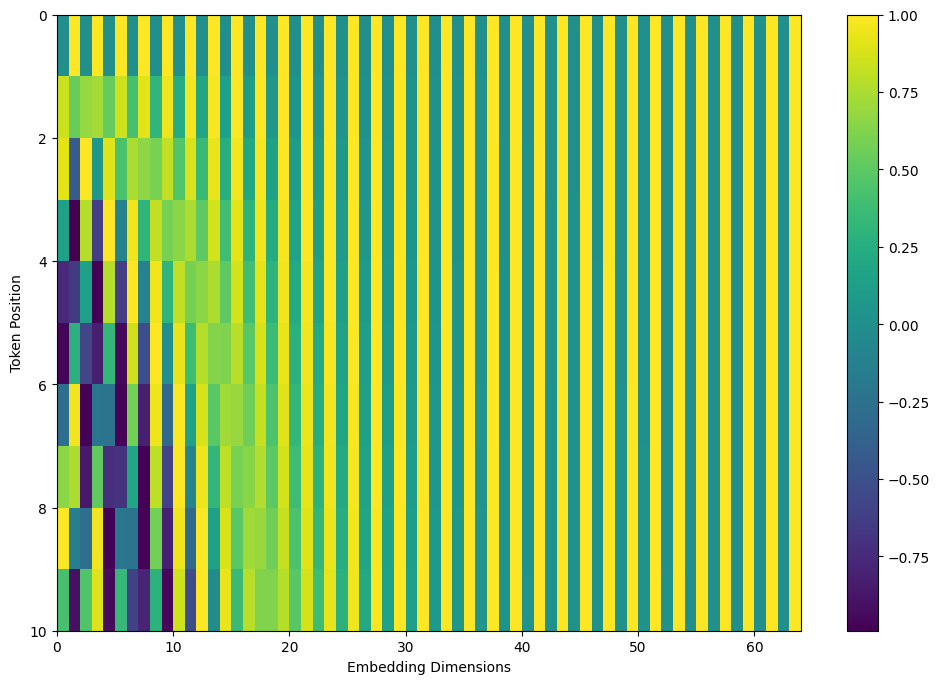

In [136]:
import matplotlib.pyplot as plt

tokens = 10
dimensions = 64

pos_encoding = get_positional_encoding(tokens, dimensions)
print (pos_encoding.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

#### Multihead Attention
Different tokens in an input can relate to each other in many different ways simultaneously.  For example, in a language processing scenario, different syntactic, semantic, and discourse relationships can hold between verbs and their arguments in a sentence.  It would be difficult for a single transformer block to learn to capture all the different kinds of parallel relations among its inputs.  Transformers address this issue with multihead self-attention layers.  These are sets of self-attention layers, called **heads**, that reside in parallel layers at the same depth in a model, each with its own set of parameters.
Given each head has distinct set of parameters, it can learn different aspects of the relationships that exist among inputs at the same level of abstraction.

In multi-head attention, instead of using the model dimension $d$ that's used for the input and output from the model, the key and query embeddings have dimensionality $d_k$, and the value embeddings are of dimensionality $d_v$ (in the original transformer paper $d_k = d_v = 64$).  

Thus for each head $i$, we have weight matrices $W^Q_i \in \R^{d \times d_k}$, $W^K_i \in \R^{d \times d_k}$ and $W^V_i \in \R^{d \times d_v}$.
These matrices get multiplied by by the inputs packed into $X \in \R^{N \times d}$ where $N$ is the maximum sequence length.

e.g. $$[X]_{N \times d} \times [W^Q_i]_{d \times d_k} = [Q_i]_{N \times d_k}$$
similarly, for the other projections.
Following the complete attention computation, output of each head $i$ is of shape $N \times d_v$.  So, for $h$ heads, $h$ matrices of shape $N \times d_v$ are produced.  To make use of these matrices in further processing, they are combined and then reduced down to orignial input dimension $d$.  To do this, all these matrices are **concatenated** followed by a linear projection, $W^O \in \R^{hd_v \times d}$  to reduce it to the original output dimension for each token i.e. a total $N \times d$ dimensional output.

$$MultiHeadAttention(X) = (head_1 \oplus head_2 ... \oplus head_n) W^O$$

$$\implies MultiHeadAttension(X) = [ SelfAttention(Q_1, K_1, V_1) \oplus SelfAttention(Q_2, K_2, V_2) \space ... \space SelfAttention(Q_n, K_n, V_n)] W^O$$

$$\implies MultiHeadAttention(X) = [ softmax( \frac{Q_1K_1^T}{\sqrt(d)} ) V_1 \oplus softmax( \frac{Q_2K_2^T}{\sqrt(d)} ) V_2 \space ... \space softmax( \frac{Q_nK_n^T}{\sqrt(d)} ) V_n ] W^O $$

Where

$\oplus \implies$ Concatenation operation


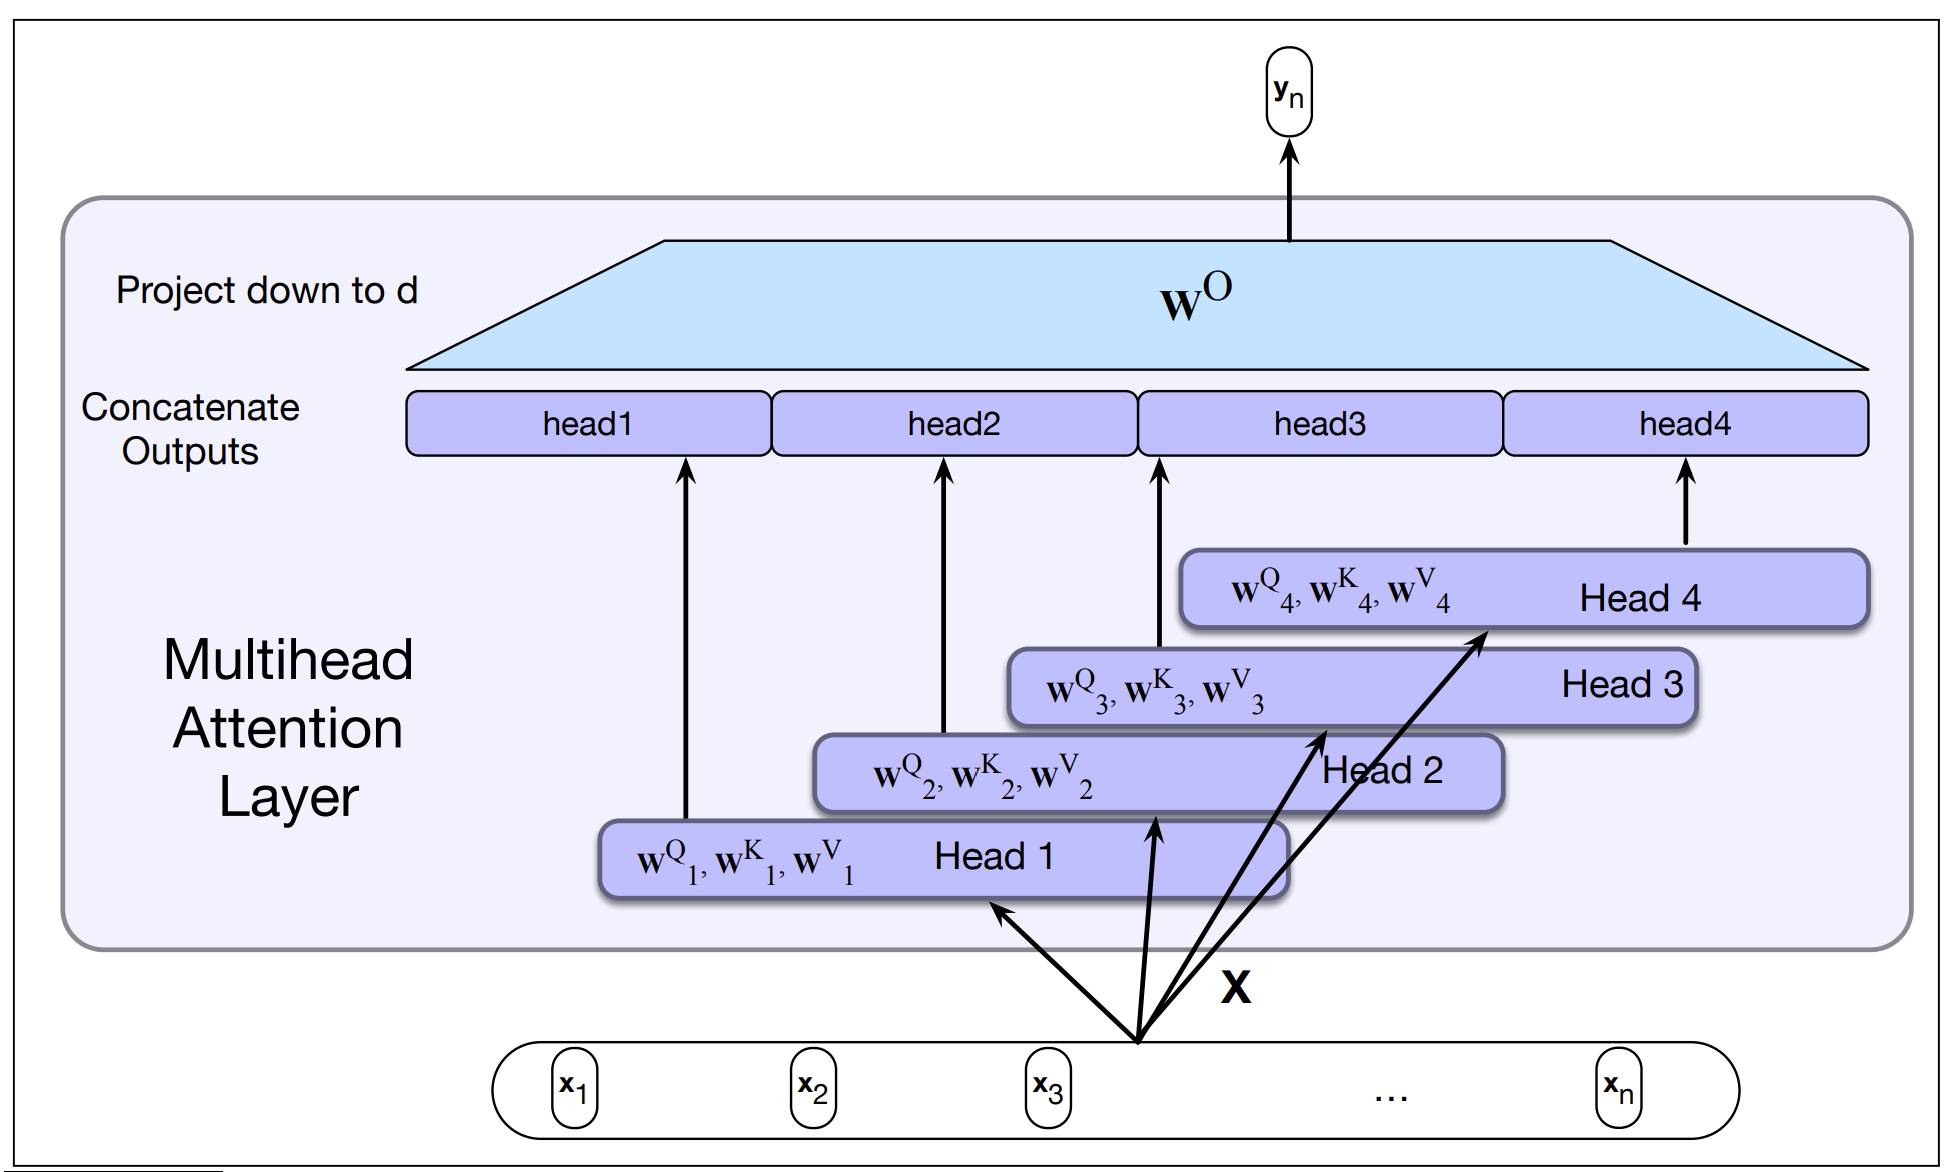


Multi-head attention - a few trials first

In [137]:
N = 10
embed_dim = 64
num_head = 12
X_token_emb = torch.rand(N, embed_dim)

# linear projection q for all heads i.e. num_head * embed_dim
linear_proj_q = torch.nn.Linear(embed_dim,num_head * embed_dim,False) #False implies no bias

linear_proj_k = torch.nn.Linear(embed_dim,num_head * embed_dim,False)

linear_proj_v = torch.nn.Linear(embed_dim,num_head * embed_dim,False)


print('Parameter matrix weight' + str(linear_proj_q.weight.shape))

q = linear_proj_q(X_token_emb)
k = linear_proj_k(X_token_emb)
v = linear_proj_v(X_token_emb)
print('q shape: ' + str(q.shape))


print('number of entries : ' + str(len(q)))
print('Shape of each entry: ' + str(q[0].shape))

# dimensionalize the q, k and v for each head with the shape (num_head, N, embed_dim)
q = q.view(N,num_head,embed_dim).transpose(1,0) # transpose is used to move the num_head to the first dimension
k = k.view(N,num_head,embed_dim).transpose(1,0)
v = v.view(N,num_head,embed_dim).transpose(1,0)

# print(q.shape)

print('q shape: ' + str(q.shape))
print('k transpose shape: ' + str(k.transpose(-2,-1).shape)) # this transpose will swap (numHeads, N, embed_dim) to (humHeads, embed_dim, N)

score = torch.matmul(q,k.transpose(-2,-1)) ##(numHeads, N, E) x (numHeads, E, N) => (numHeads, N, N)
print('' + str(score.shape))


scaled_score = score / np.sqrt(embed_dim) # (numHeads, N,N)

print('Scaled score shape' + str(scaled_score.shape))

        
causal_attention_mask = torch.ones(num_head, N, N).tril() # (numHeads, N,N)

causal_scaled_score = scaled_score.masked_fill(causal_attention_mask[:,:] == 0, -float('inf')) # (numHeads, N,N)

print(causal_scaled_score.shape)
        


Parameter matrix weighttorch.Size([768, 64])
q shape: torch.Size([10, 768])
number of entries : 10
Shape of each entry: torch.Size([768])
q shape: torch.Size([12, 10, 64])
k transpose shape: torch.Size([12, 64, 10])
torch.Size([12, 10, 10])
Scaled score shapetorch.Size([12, 10, 10])
torch.Size([12, 10, 10])


Multi Head Attention - own implementation

In [138]:
import torch
import torch.nn
torch.seed = 123

class CausalSelfAttention(torch.nn.Module):

    def __init__(self, numHeads:int, sequenceLength:int, embeddingDimensionality:int):
        """
        Initializes the Transformer model.

        Args:
            numHeads (int): The number of attention heads.
            sequenceLength (int): The length of the input sequence.
            embeddingDimensionality (int): The dimensionality of the input sequence embeddings.
        """
        super().__init__()
        self.sequenceLength = sequenceLength
        self.embeddingDimension = embeddingDimensionality
        self.numHeads = numHeads
        self.inputSequenceEmbeddingMatrix:torch.Tensor

        self.queryWeightMatrix:torch.Tensor  = None
        self.keyWeightMatrix:torch.Tensor = None
        self.valueWeightMatrix:torch.Tensor = None


    def _initialize_parameterMatrix(self, parameterMatrix: torch.tensor, useBias=False):
        """
        Initializes the parameter matrix if it is None.

        Args:
            parameterMatrix (torch.tensor): The parameter matrix to be initialized.
            useBias (bool, optional): Whether to include bias in the linear transformation. Defaults to False.

        Returns:
            torch.tensor: The initialized parameter matrix.
        """
        if parameterMatrix is None:
            parameterMatrix = torch.nn.Linear(self.embeddingDimension, self.numHeads * self.embeddingDimension, useBias)
            return parameterMatrix
        else:
            print('parameter matrix already initialized')


    def _ignoreFutureTokensForCausalLm(self, scoreTensor: torch.Tensor)->torch.Tensor:

        assert scoreTensor.shape == torch.Size([self.numHeads, self.sequenceLength, self.sequenceLength])
        
        causal_attention_mask = torch.ones(self.numHeads, self.sequenceLength, self.sequenceLength).tril() # (numHeads, N, N)

        causal_scaled_score = scoreTensor.masked_fill(causal_attention_mask[:,:] == 0, -float('inf')) # (numHeads, N, N)

        return causal_scaled_score

    
    def forward(self, x):
        """
        Performs the forward pass of the self-attention layer.

        Args:
            x (torch.Tensor): Input sequence embedding matrix of shape (N, d), where N is the number of input tokens and d is the embedding dimension.

        Returns:
            torch.Tensor: Output of the self-attention layer, a tensor of shape (numHeads, N, E), where numHeads is the number of attention heads, N is the number of input tokens, and E is the embedding dimension.
        """
        # Rest of the code...
    def forward(self, x):          
        
        if(x.ndim != 2):
            raise Exception("inputSequenceEmbeddingMatrix should be a N x d dimensional matrix for N input tokens with each having a embedding dimension of d")

        num_tokens = x.shape[0]
        embed_dimension = x.shape[1]

        if self.embeddingDimension != embed_dimension:
            raise Exception("inputSequenceEmbeddingMatrix embedding dimension: {embed_dimension} is not matching with initialized embeddingDimension: {embedding_dimension}".format(embed_dimension,self.embeddingDimension))
        
        if self.sequenceLength != num_tokens:
            raise Exception("Sequence lengths don't match")
        
        
        self.queryWeightMatrix = self._initialize_parameterMatrix(self.queryWeightMatrix) #numHeads x d x d
        self.keyWeightMatrix = self._initialize_parameterMatrix(self.keyWeightMatrix) #numHeads x d x d
        self.valueWeightMatrix = self._initialize_parameterMatrix(self.valueWeightMatrix) #numHeads x d x d

        Q = self.queryWeightMatrix(x) #.split(self.embeddingDimension, dim=1) # tuple with numHeads entries each with (N,E)
        K = self.keyWeightMatrix(x) #.split(self.embeddingDimension, dim=1) # tuple with numHeads entries each with (N,E)
        V = self.valueWeightMatrix(x) #.split(self.embeddingDimension, dim=1) # tuple with numHeads entries each with (N,E)

        Q = Q.view(self.sequenceLength, self.numHeads, self.embeddingDimension).transpose(1,0) # (N, numHeads, E) -> transpose() -> (numHeads, N, E)
        K = K.view(self.sequenceLength, self.numHeads, self.embeddingDimension).transpose(1,0) # (N, numHeads, E) -> transpose() -> (numHeads, N, E)
        V = V.view(self.sequenceLength, self.numHeads, self.embeddingDimension).transpose(1,0) # (N, numHeads, E) -> transpose() -> (numHeads, N, E)



        # Q = torch.matmul(x, self.queryMatrix) #(N,E) x (E, E) => (N, E)
        # K = torch.matmul(x, self.keyMatrix) #(N,E) x (E, E) => (N, E)
        # V = torch.matmul(x, self.valueMatrix) #(N,E) x (E, E) => (N, E)

        score = torch.matmul(Q,K.transpose(-2,-1)) ##(numHeads, N, E) x (numHeads, E, N) => (numHeads, N, N)

        scaled_score = score / np.sqrt(embed_dimension) # (numHeads, N,N)

        causal_scaled_score = self._ignoreFutureTokensForCausalLm(scaled_score)

        #causal_attention_mask = torch.ones(self.sequenceLength, self.sequenceLength).tril() # (N,N)

        #causal_scaled_score = scaled_score.masked_fill(causal_attention_mask[:,:] == 0, -float('inf')) # (N,N)

        causal_scaled_score_softmax = torch.softmax(causal_scaled_score, dim=1) # (numHeads, N, N)

        # print('Causal scaled score : ' + str(causal_scaled_score))
        # print('Causal Scaled Softmax: ' + str(causal_scaled_score_softmax))

        causal_self_attention_output = causal_scaled_score_softmax @ V # (numHeads, N, N) dot (numHeads, N, E)

        return causal_self_attention_output


In [139]:
# trying our multi head attention implementation
print(X_token_emb.shape)
print(embed_dim)
attention = CausalSelfAttention(num_head, N, embed_dim)
out = attention(X_token_emb)

print(out.shape)

# print(out)

torch.Size([10, 64])
64
torch.Size([12, 10, 64])


Multi-head attention - efficient one using pytorch



ref: 
* https://pytorch.org/docs/stable/generated/torch.nn.functional.scaled_dot_product_attention.html
* https://www.tensorflow.org/text/tutorials/transformer


In [140]:
# print(torch.__version__)


import torch
import torch.nn

class FlashCausalSelfAttention(torch.nn.Module):

    def __init__(self, numHeads:int, sequenceLength:int, embeddingDimensionality:int):
        super().__init__()
        self.sequenceLength = sequenceLength
        self.embeddingDimension = embeddingDimensionality
        self.numHeads = numHeads
        self.inputSequenceEmbeddingMatrix:torch.Tensor

        self.queryMatrix:torch.Tensor  = None
        self.keyMatrix:torch.Tensor = None
        self.valueMatrix:torch.Tensor = None


    def _initialize_parameterMatrix(self, parameterMatrix:torch.tensor, useBias=False):
        
        if parameterMatrix is None:
            parameterMatrix = torch.nn.Linear(self.embeddingDimension, self.numHeads * self.embeddingDimension, useBias)
            return parameterMatrix
        else:
            print('parameter matrix already initialized')


    def _ignoreFutureTokensForCausalLm(self, scoreTensor: torch.Tensor)->torch.Tensor:

        assert scoreTensor.shape == torch.Size([self.numHeads, self.sequenceLength, self.sequenceLength])
        
        causal_attention_mask = torch.ones(self.numHeads, self.sequenceLength, self.sequenceLength).tril() # (numHeads, N, N)

        causal_scaled_score = scoreTensor.masked_fill(causal_attention_mask[:,:] == 0, -float('inf')) # (numHeads, N, N)

        return causal_scaled_score

    
    def forward(self, x):          
        
        if(x.ndim != 2):
            raise Exception("inputSequenceEmbeddingMatrix should be a N x d dimensional matrix for N input tokens with each having a embedding dimension of d")

        num_tokens = x.shape[0]
        embed_dimension = x.shape[1]

        if self.embeddingDimension != embed_dimension:
            raise Exception("inputSequenceEmbeddingMatrix embedding dimension: {embed_dimension} is not matching with initialized embeddingDimension: {embedding_dimension}".format(embed_dimension,self.embeddingDimension))
        
        if self.sequenceLength != num_tokens:
            raise Exception("Sequence lengths don't match")
        
        
        self.queryMatrix = self._initialize_parameterMatrix(self.queryMatrix) #numHeads x d x d
        self.keyMatrix = self._initialize_parameterMatrix(self.keyMatrix) #numHeads x d x d
        self.valueMatrix = self._initialize_parameterMatrix(self.valueMatrix) #numHeads x d x d

        Q = self.queryMatrix(x) #.split(self.embeddingDimension, dim=1) # tuple with numHeads entries each with (N,E)
        K = self.keyMatrix(x) #.split(self.embeddingDimension, dim=1) # tuple with numHeads entries each with (N,E)
        V = self.valueMatrix(x) #.split(self.embeddingDimension, dim=1) # tuple with numHeads entries each with (N,E)

        Q = Q.view(self.sequenceLength, self.numHeads, self.embeddingDimension).transpose(1,0) # (N, numHeads, E) -> transpose() -> (numHeads, N, E)
        K = K.view(self.sequenceLength, self.numHeads, self.embeddingDimension).transpose(1,0) # (N, numHeads, E) -> transpose() -> (numHeads, N, E)
        V = V.view(self.sequenceLength, self.numHeads, self.embeddingDimension).transpose(1,0) # (N, numHeads, E) -> transpose() -> (numHeads, N, E)

        # https://pytorch.org/docs/stable/generated/torch.nn.functional.scaled_dot_product_attention.html
        causal_self_attention_output = torch.nn.functional.scaled_dot_product_attention(query=Q, key=K, value=V, attn_mask=None, is_causal=True )


        return causal_self_attention_output


In [147]:
# N = 4
# embed_dim = 3

# X_token_emb = torch.rand(N,embed_dim)

# print('X_token_emb: ' + str(X_token_emb))

pos_emb = get_positional_encoding(N, embed_dim)
# print('pos_emb: ' + str(pos_emb))

# adding token and positional embeddings
X_token_pos_emb = torch.add(X_token_emb, pos_emb)
# print('X_token_pos_emb: ' + str(X_token_pos_emb))

# print('X_token_emb.shape: ' + str(X_token_emb.shape))
# print('pos_emb.shape :' + str(pos_emb.shape))
# print('X_token_pos_emb.shape: ' + str(X_token_pos_emb.shape))

attention_manual = CausalSelfAttention(num_head, N, embed_dim)
attention_flash = FlashCausalSelfAttention(num_head, N, embed_dim)
out_flash = attention_flash(X_token_pos_emb)
out_manual = attention_manual(X_token_pos_emb)

print('flash attention shape: ' + str(out_flash.shape))
print('manual attention shape: ' +  str(out_manual.shape))


# print(attention_manual.queryMatrix.weight)
# print(attention_flash.queryMatrix.weight)

# linear layer weights are initialized with a sampling from distribution based on # of in_features 
# as explained here: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
# hence, weights of 2 idential linear layers won't be same. 
torch.seed=123
l1 = torch.nn.Linear(5,10,False)
l2 = torch.nn.Linear(5,10,False)
# print(l1.weight)
# print(l2.weight)

X_token_emb.shape: torch.Size([10, 64])
pos_emb.shape :torch.Size([10, 64])
X_token_pos_emb.shape: torch.Size([10, 64])
flash attention shape: torch.Size([12, 10, 64])
manual attention shape: torch.Size([12, 10, 64])


Generally, we implement Transformer blocks and in turn, attention layers in batches of input sequences to benefit from efficiency gains in matrix multiplications.  Let's add the concept of batch size in our attenion and then transformer block. 

In [190]:
# print(torch.__version__)


import torch
import torch.nn

class FlashCausalSelfAttention(torch.nn.Module):

    def __init__(self, numHeads:int, sequenceLength:int, embeddingDimensionality:int):
        super().__init__()
        self.sequenceLength = sequenceLength
        self.embeddingDimension = embeddingDimensionality
        self.numHeads = numHeads
        self.inputSequenceEmbeddingMatrix:torch.Tensor

        self.queryMatrix:torch.Tensor  = None
        self.keyMatrix:torch.Tensor = None
        self.valueMatrix:torch.Tensor = None


    def _initialize_parameterMatrix(self, parameterMatrix:torch.tensor, useBias=False):
        
        if parameterMatrix is None:
            parameterMatrix = torch.nn.Linear(self.embeddingDimension, self.numHeads * self.embeddingDimension, useBias)
            return parameterMatrix
        else:
            print('parameter matrix already initialized')


    def _ignoreFutureTokensForCausalLm(self, scoreTensor: torch.Tensor)->torch.Tensor:

        assert scoreTensor.shape == torch.Size([self.numHeads, self.sequenceLength, self.sequenceLength])
        
        causal_attention_mask = torch.ones(self.numHeads, self.sequenceLength, self.sequenceLength).tril() # (numHeads, N, N)

        causal_scaled_score = scoreTensor.masked_fill(causal_attention_mask[:,:] == 0, -float('inf')) # (numHeads, N, N)

        return causal_scaled_score

    
    def forward(self, x:torch.tensor):          
        '''
        x: torch.tensor[B,N,d] --> B = batch size, N = sequnce length and d = embedding dimensionality
        '''
        assert x.ndim == 3

        if(x.ndim != 3):
            raise Exception("inputSequenceEmbeddingMatrix should be a B x N x d dimensional matrix for B batches of N input tokens with each having a embedding dimension of d")

        batch_size = x.shape[0]
        num_tokens = x.shape[1]
        embed_dimension = x.shape[2]

        if self.embeddingDimension != embed_dimension:
            raise Exception("inputSequenceEmbeddingMatrix embedding dimension: {embed_dimension} is not matching with initialized embeddingDimension: {embedding_dimension}".format(embed_dimension,self.embeddingDimension))
        
        if self.sequenceLength != num_tokens:
            raise Exception("Sequence lengths don't match")
        
        
        self.queryMatrix = self._initialize_parameterMatrix(self.queryMatrix) #numHeads x d x d
        self.keyMatrix = self._initialize_parameterMatrix(self.keyMatrix) #numHeads x d x d
        self.valueMatrix = self._initialize_parameterMatrix(self.valueMatrix) #numHeads x d x d

        # [x](BatchSize, N, d) x [weight](d, (numHeads x d)) => (BatchSize, N x (numHeads x d))
        Q = self.queryMatrix(x) #.split(self.embeddingDimension, dim=1) # tuple with numHeads entries each with (N,E)

        # print(Q.shape)


        K = self.keyMatrix(x) #.split(self.embeddingDimension, dim=1) # tuple with numHeads entries each with (N,E)
        V = self.valueMatrix(x) #.split(self.embeddingDimension, dim=1) # tuple with numHeads entries each with (N,E)

        Q = Q.view(batch_size, self.sequenceLength, self.numHeads, self.embeddingDimension).transpose(1,2) # (BatchSize, N, numHeads, E) -> transpose() -> (BatchSize, numHeads, N, E)
        K = K.view(batch_size, self.sequenceLength, self.numHeads, self.embeddingDimension).transpose(1,2) # (BatchSize, N, numHeads, E) -> transpose() -> (BatchSize, numHeads, N, E)
        V = V.view(batch_size, self.sequenceLength, self.numHeads, self.embeddingDimension).transpose(1,2) # (BatchSize, N, numHeads, E) -> transpose() -> (BatchSize, numHeads, N, E)

        # https://pytorch.org/docs/stable/generated/torch.nn.functional.scaled_dot_product_attention.html
        causal_self_attention_output = torch.nn.functional.scaled_dot_product_attention(query=Q, key=K, value=V, attn_mask=None, is_causal=True )


        return causal_self_attention_output

In [155]:
batch_size = 5
print(X_token_pos_emb.shape)
print(N)
print(embed_dim)
print(num_head)

X_token_emb_batch = torch.rand(batch_size, N, embed_dim)

print(X_token_emb_batch.shape)

flashCausalAttention = FlashCausalSelfAttention(num_head, N, embed_dim)

out_flash_batch = flashCausalAttention(X_token_emb_batch)

print(out_flash_batch.shape)

torch.Size([10, 64])
10
64
12
torch.Size([5, 10, 64])
torch.Size([5, 10, 768])
torch.Size([5, 12, 10, 64])


Now, let's update the transformer block with all the changes related to batch and efficient attention computation:

In [204]:
class TransformerBlock(torch.nn.Module):
    def __init__(self, numHeads:int, sequenceLength:int, embeddingDimensionality:int):
        super().__init__()
        self.sequenceLength = sequenceLength
        self.embed_dim = embeddingDimensionality
        self.numHeads = numHeads
        self.SelfAttentionLayer = FlashCausalSelfAttention(numHeads, sequenceLength, embeddingDimensionality)
        self.layerNorm = torch.nn.LayerNorm(self.embed_dim)
        self.feedForwardLayer = FFN(self.embed_dim)
    
    def forward(self, x):
        '''
        x: torch.tensor[B,N,d] --> B = batch size, N = sequnce length and d = embedding dimensionality
        '''
        attention_out = self.SelfAttentionLayer(x) # output dimension: (B, numHeads, N, d)
        # print('attention_out.shape: ' + str(attention_out.shape))

        # organize the attention output by heads
        # (B, numHeads, N, d) -> Transpose -> (B, N, numHeads, d) -> view -> (numHeads, B, N, d)
        attention_out = attention_out.transpose(1, 2).contiguous().view(self.numHeads, x.shape[0], self.sequenceLength, self.embed_dim)
        z = self.layerNorm(x + attention_out)
        y = self.layerNorm(z + self.feedForwardLayer(z))
        return y

Let's also update our positional embedding computation to factor in the batch aspect:

In [171]:
def get_angles(token_positions, embedding_channels, token_embed_dim:int):
  angle_rates = 1 / np.power(10000, (2 * (embedding_channels//2)) / np.float32(token_embed_dim))
  # print('angle rates: ' + str(angle_rates))
  return token_positions * angle_rates

def get_positional_encoding(batch_size:int, num_tokens:int, token_embedding_dim:int):
  
  token_positions = np.arange(num_tokens)[:, np.newaxis]
  
  # print(token_positions.shape)
  
  token_embedding_channels = np.arange(token_embedding_dim)[np.newaxis, :]

  # print(token_embedding_channels.shape)

  angle_rads = get_angles(token_positions, token_embedding_channels, token_embedding_dim)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2]) # 0::2 -> stepsize of 2 starting with 0 thus selecting even indices
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2]) # 1::2 --> stepsize of 2 starting with 1 thus selecting odd indices
    
  # pos_encoding = angle_rads[np.newaxis, ...]

  # print('angle_rads.shape: ' + str(angle_rads.shape))

  angle_rads = torch.Tensor(angle_rads)

  # repeat() repeats the tensor (batch_size x 1) times and then, we reshape it to batchsize, N, E

  angle_rads = angle_rads.repeat(batch_size, 1).reshape(batch_size,num_tokens, token_embedding_dim)
  

  return angle_rads

In [182]:
# check positional embedding with batch input.
batch_size = 5
print('N: ' + str(N))
print('embed_dim: ' + str(embed_dim))
print('num_head: ' + str(num_head))
print('Batch Size: ' + str(batch_size))

X_token_emb_batch = torch.rand(batch_size, N, embed_dim)

pos_emb_batch = get_positional_encoding(batch_size, N, embed_dim)

print('pos_emb.shape: ' + str(pos_emb_batch.shape))

# print(pos_emb_batch[2,5,:])
# print(pos_emb_batch[4,5,:])

# sample validation that the 5th token's embedding for 3rd and 4th batches are same.
print(torch.allclose(pos_emb_batch[3,5,:], pos_emb_batch[4,5,:]))

N: 10
embed_dim: 64
num_head: 12
Batch Size: 5
pos_emb.shape: torch.Size([5, 10, 64])
True


In [205]:
batch_size = 5

print('X_token_pos_emb.shape: ' + str(X_token_pos_emb.shape))
print('N: ' + str(N))
print('embed_dim: ' + str(embed_dim))
print('num_head: ' + str(num_head))
print('Batch Size: ' + str(batch_size))

# adding token and positional embeddings
X_token_pos_emb_batch = torch.add(X_token_emb_batch, pos_emb_batch)

print('X_token_pos_emb_batch.shape: ' + str(X_token_pos_emb_batch.shape))


# fcsa = FlashCausalSelfAttention(num_head,N, embed_dim)
# out = fcsa(X_token_emb_batch)

# print(out.shape) #B,H,N,E

# out = out.transpose(1, 2).contiguous().view(num_head, batch_size, N, embed_dim)

# xplusattn = X_token_pos_emb_batch + out

# print(out.shape)
# print(xplusattn.shape)

transformerBlock = TransformerBlock(num_head, N, embed_dim)

transformerBlockResult = transformerBlock(X_token_pos_emb_batch)

print('transformerBlockResult.shape: ' + str(transformerBlockResult.shape)) #numHeads, BatchSize, N, embed_dim



X_token_pos_emb.shape: torch.Size([10, 64])
N: 10
embed_dim: 64
num_head: 12
Batch Size: 5
X_token_pos_emb_batch.shape: torch.Size([5, 10, 64])
transformerBlockResult.shape: torch.Size([12, 5, 10, 64])


Let's put together everything we learnt so far as our evolved TransformerBlock.  Also, let's organize the positional embedding generation method under the TransformerBlock for better maintainability.

**A Tranformer Block with Causal Self-Attention**

In [209]:
class TransformerBlock(torch.nn.Module):
    def __init__(self, numHeads:int, sequenceLength:int, embeddingDimensionality:int):
        super().__init__()
        self.sequenceLength = sequenceLength
        self.embed_dim = embeddingDimensionality
        self.numHeads = numHeads
        self.SelfAttentionLayer = FlashCausalSelfAttention(numHeads, sequenceLength, embeddingDimensionality)
        self.layerNorm = torch.nn.LayerNorm(self.embed_dim)
        self.feedForwardLayer = FFN(self.embed_dim)
    
    def forward(self, x):
        '''
        x: torch.tensor[B,N,d] --> B = batch size, N = sequnce length and d = embedding dimensionality
        '''
        attention_out = self.SelfAttentionLayer(x) # output dimension: (B, numHeads, N, d)
        # print('attention_out.shape: ' + str(attention_out.shape))

        # organize the attention output by heads
        # (B, numHeads, N, d) -> Transpose -> (B, N, numHeads, d) -> view -> (numHeads, B, N, d)
        attention_out = attention_out.transpose(1, 2).contiguous().view(self.numHeads, x.shape[0], self.sequenceLength, self.embed_dim)
        z = self.layerNorm(x + attention_out)
        y = self.layerNorm(z + self.feedForwardLayer(z))
        return y
    
    def _get_angles(self, token_positions, embedding_channels, token_embed_dim:int):
        angle_rates = 1 / np.power(10000, (2 * (embedding_channels//2)) / np.float32(token_embed_dim))  
        # print('angle rates: ' + str(angle_rates))
        return token_positions * angle_rates

    def get_positional_embedding(self, batch_size:int, num_tokens:int, token_embedding_dim:int):
  
        token_positions = np.arange(num_tokens)[:, np.newaxis]
  
        # print(token_positions.shape)
  
        token_embedding_channels = np.arange(token_embedding_dim)[np.newaxis, :]

        # print(token_embedding_channels.shape)
        
        
        angle_rads = self._get_angles(token_positions, token_embedding_channels, token_embedding_dim)
        
        # apply sin to even indices in the array; 2i
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2]) # 0::2 -> stepsize of 2 starting with 0 thus selecting even indices
        
        # apply cos to odd indices in the array; 2i+1
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2]) # 1::2 --> stepsize of 2 starting with 1 thus selecting odd indices
            
        # print('angle_rads.shape: ' + str(angle_rads.shape))

        angle_rads = torch.Tensor(angle_rads)

        # repeat() repeats the tensor (batch_size x 1) times and then, we reshape it to batchsize, N, E

        angle_rads = angle_rads.repeat(batch_size, 1).reshape(batch_size,num_tokens, token_embedding_dim)
        

        return angle_rads

In [210]:
batch_size = 5

print('X_token_pos_emb.shape: ' + str(X_token_pos_emb.shape))
print('N: ' + str(N))
print('embed_dim: ' + str(embed_dim))
print('num_head: ' + str(num_head))
print('Batch Size: ' + str(batch_size))


transformerBlock = TransformerBlock(num_head, N, embed_dim)

pos_emb_batch = transformerBlock.get_positional_embedding(batch_size,N, embed_dim)

# adding token and positional embeddings
X_token_pos_emb_batch = torch.add(X_token_emb_batch, pos_emb_batch)
print('X_token_pos_emb_batch.shape: ' + str(X_token_pos_emb_batch.shape))

transformerBlockResult = transformerBlock(X_token_pos_emb_batch)

print('transformerBlockResult.shape: ' + str(transformerBlockResult.shape)) #numHeads, BatchSize, N, embed_dim

X_token_pos_emb.shape: torch.Size([10, 64])
N: 10
embed_dim: 64
num_head: 12
Batch Size: 5
X_token_pos_emb_batch.shape: torch.Size([5, 10, 64])
transformerBlockResult.shape: torch.Size([12, 5, 10, 64])
